In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_wine

wine=load_wine(as_frame=True)
df=wine.frame
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
x=df.drop(columns='target')
y=df['target']

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
print(f"X Train shape: {x_train.shape}, X Test shape: {x_test.shape}")
print(f"Y Train shape: {y_train.shape}, Y Test shape: {y_test.shape}")


X Train shape: (142, 13), X Test shape: (36, 13)
Y Train shape: (142,), Y Test shape: (36,)


In [6]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)


In [7]:
x_train=x_train_scaled[:,[0,1]]
x_test=x_test_scaled[0:,[0,1]]
print(f"X Train shape: {x_train.shape}, X Test shape: {x_test.shape}")


X Train shape: (142, 2), X Test shape: (36, 2)


In [8]:
# selecting the model we want to use single layer perceptron
from sklearn.linear_model import Perceptron
perc=Perceptron(max_iter=1000,random_state=42)
perc.fit(x_train,y_train) # train  the model on the training data

Perceptron(random_state=42)

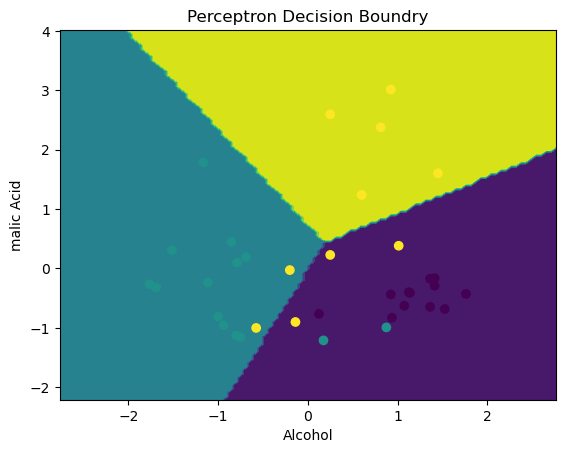

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    perc,x_test,response_method='predict',
    xlabel='Alcohol',ylabel='malic Acid'
)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.title("Perceptron Decision Boundry")
plt.show()

In [10]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,confusion_matrix,precision_score
y_pred = perc.predict(x_test)
# y_pred_proba=perc.predict_proba(x_test)
print(f"accuracy :{accuracy_score(y_test,y_pred)}")
print(f"precision :{precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall :{recall_score(y_test,y_pred,average='weighted')}")
print(f"F1_score :{f1_score(y_test,y_pred,average='weighted')}")



accuracy :0.8055555555555556
precision :0.8464052287581699
Recall :0.8055555555555556
F1_score :0.7943805874840356


In [14]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(3,),
                  max_iter=10000,
                  random_state=42
                  ,activation='relu',
                  alpha=0.01,)
mlp.fit(x_train,y_train)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(3,), max_iter=10000,
              random_state=42)

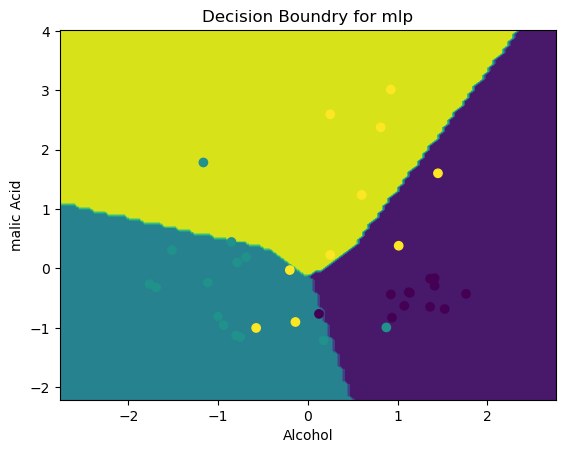

In [17]:
DecisionBoundaryDisplay.from_estimator(
    mlp,x_test,response_method='predict',
    xlabel='Alcohol',ylabel='malic Acid'
)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.title("Decision Boundry for mlp")
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "hidden_layer_sizes":[(5,),(10,),(20,)],
    "activation":['relu','tanh','logistic'],
    "alpha":[0.0001,0.001,0.01,0.1]
}
mlp=MLPClassifier(
                  max_iter=1000,
                  random_state=42)
grid=GridSearchCV(mlp,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(5,), (10,), (20,)]},
             scoring='accuracy')

In [26]:
best_mlp=grid.best_estimator_

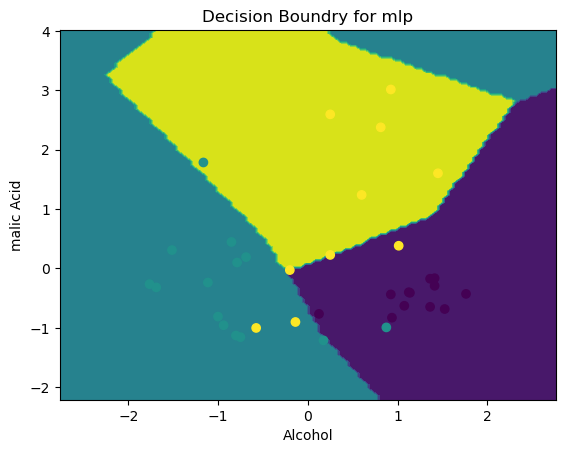

In [ ]:

DecisionBoundaryDisplay.from_estimator(
    best_mlp,x_test,response_method='predict',
    xlabel='Alcohol',ylabel='malic Acid'
)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.title("Decision Boundry for mlp")
plt.show()


In [30]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,confusion_matrix,precision_score
y_pred = best_mlp.predict(x_test)
# y_pred_proba=perc.predict_proba(x_test)
print(f"accuracy :{accuracy_score(y_test,y_pred)*100}")
print(f"precision :{precision_score(y_test,y_pred,average='weighted')*100}")
print(f"Recall :{recall_score(y_test,y_pred,average='weighted')*100}")
print(f"F1_score :{f1_score(y_test,y_pred,average='weighted')*100}")



accuracy :83.33333333333334
precision :83.80952380952381
Recall :83.33333333333334
F1_score :82.57080610021785


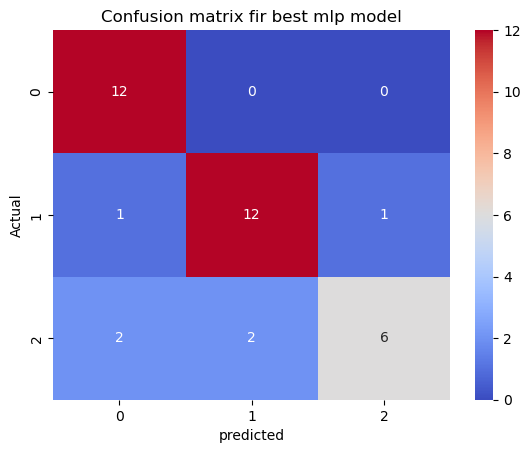

In [31]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix fir best mlp model")
plt.show()
